In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-05-27 14:42:15--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.9’

insurance.csv.9     100%[===================>]  49.09K  --.-KB/s    in 0.009s  

2023-05-27 14:42:16 (5.23 MB/s) - ‘insurance.csv.9’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
len(dataset)

1338

In [ ]:
dataset["sex"] = pd.factorize(dataset["sex"])[0]
dataset['smoker']=pd.factorize(dataset['smoker'])[0]
dataset['region']=pd.factorize(dataset['region'])[0]

In [ ]:
test_data=dataset.sample(frac=0.2)
len(test_data)

268

In [ ]:
train_data = dataset[~dataset.isin(test_data)].dropna()
len(train_data)

1070

In [ ]:
train_label=train_data.pop('expenses')
test_label=test_data.pop('expenses')
train_label
test_label

1169     6112.35
84      39836.52
986      8410.05
909     17496.31
185     43753.34
          ...   
53      37742.58
189      4922.92
833     11743.93
352      3554.20
1069    10928.85
Name: expenses, Length: 268, dtype: float64

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_data))

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D

# Define the model
model = keras.Sequential()
model.add(normalizer)
model.add(Dense(16, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 142
Trainable params: 129
Non-trainable params: 13
_________________________________________________________________


In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)

In [ ]:
history = model.fit(
    train_data,
    train_label,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

9/9 - 0s - loss: 3274.5388 - mae: 3274.5388 - mse: 33686132.0000 - 79ms/epoch - 9ms/step
Testing set Mean Abs Error: 3274.54 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 7ms/step


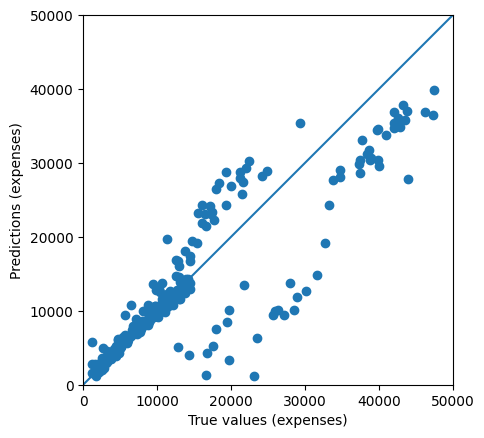

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_data, test_label, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
